<a href="https://colab.research.google.com/github/ShivamThapa243/DataScience/blob/main/Placement_Toy_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Steps:**

0.   Preprocess + EDA(Exploratory data Analysis) + Feature Selection
1.   Extract input and output cols
2.   Scale the values
3.  Train test split
4.  Train the model
5.  Rvaluate the model/ model selection
6.  Deploy the model


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd /content/drive/MyDrive/DataScience

/content/drive/MyDrive/DataScience


In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('placement.csv')

In [6]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
df = df.iloc[:, 1 :]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


EDA

In [11]:
import matplotlib.pyplot as plt

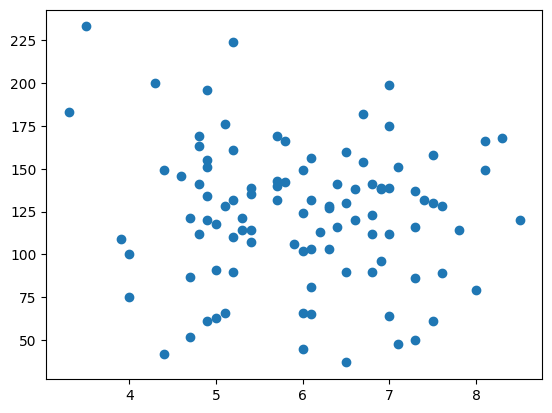

In [14]:
plt.scatter(df['cgpa'], df['iq'])

Differentiation students those who are placed and those who didn't

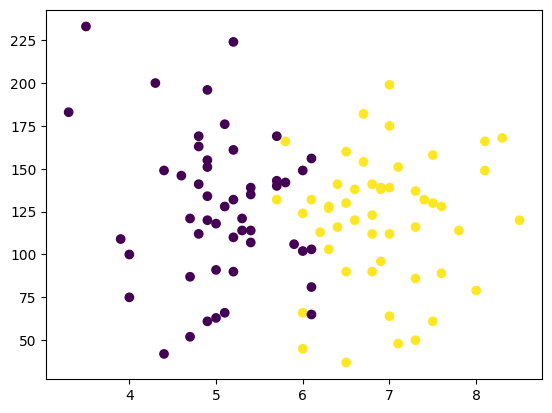

In [15]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

**Classifying the data**
* Logestic Regression : Splits the data using a line that will seperate classes

# **Extract input and output cols**

1.  Independent Cols : cpga and IQ
2.  Dependent Cols : Placement

In [16]:
x = df.iloc[:, 0 : 2]
y = df.iloc[:,-1]

In [17]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [18]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1)

In [23]:
x_train

,cgpa,iq
85,5.8,166.0
34,4.8,163.0
79,6.5,90.0
4,5.8,142.0
78,6.1,81.0
...,...,...
22,4.9,120.0
10,6.0,45.0
3,7.4,132.0
61,7.3,137.0


In [27]:
y_train

,placement
85,1
34,0
79,1
4,0
78,0
...,...
22,0
10,1
3,1
61,1


In [25]:
y_train

,placement
85,1
34,0
79,1
4,0
78,0
...,...
22,0
10,1
3,1
61,1


In [28]:
x_test

,cgpa,iq
97,6.7,182.0
36,5.7,140.0
35,6.8,90.0
70,6.3,127.0
58,8.0,79.0
91,7.5,158.0
92,5.2,110.0
83,7.5,130.0
7,5.0,63.0
72,7.3,116.0


In [29]:
y_test

,placement
97,1
36,0
35,1
70,1
58,1
91,1
92,0
83,1
7,0
72,1


# **Scaling**

In [30]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
x_train = scaler.fit_transform(x_train)

In [34]:
x_train

array([[-1.08719656e-01,  1.04198115e+00],
       [-9.90230379e-01,  9.67494809e-01],
       [ 5.08337850e-01, -8.45006159e-01],
       [-1.08719656e-01,  4.46090421e-01],
       [ 1.55733561e-01, -1.06846518e+00],
       [-8.13928234e-01, -1.49800308e-01],
       [-5.49475017e-01, -7.53139671e-02],
       [ 1.91875501e+00,  1.04198115e+00],
       [-9.90230379e-01,  4.21261640e-01],
       [ 1.55733561e-01, -5.22232014e-01],
       [-7.25777162e-01, -1.44089689e+00],
       [ 1.55733561e-01,  1.97802617e-01],
       [ 3.32035706e-01,  9.84874955e-02],
       [-8.13928234e-01, -8.20177379e-01],
       [ 8.60942139e-01,  3.46775299e-01],
       [ 3.32035706e-01, -5.22232014e-01],
       [ 1.65430179e+00, -2.49115430e-01],
       [-2.05685835e-02, -4.47745673e-01],
       [ 1.47799965e+00,  9.84874955e-02],
       [-9.02079307e-01,  2.47460178e-01],
       [-1.69543896e+00, -1.21743786e+00],
       [-6.37626090e-01, -8.45006159e-01],
       [-1.34283467e+00, -2.03678762e+00],
       [ 1.

# **Test the Model**

In [36]:
x_test = scaler.transform(x_test)

# **Train the model**

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
clf = LogisticRegression()

In [39]:
# model training
clf.fit(x_train, y_train)

LogisticRegression()

# **Evaluate the Model**

Finding the accuracy of test data

In [44]:
#what model predicted

y_predict = clf.predict(x_test)
y_predict

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1])

In [41]:
# correct output

y_test

,placement
97,1
36,0
35,1
70,1
58,1
91,1
92,0
83,1
7,0
72,1


In [42]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test, y_predict)

1.0

Plotting the decision boundary

In [47]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

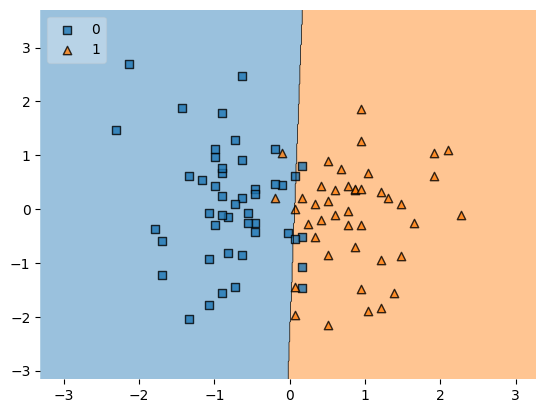

In [49]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)   #x_train is already converted to values but y_train is a serieis

In [50]:
import pickle

In [51]:
pickle.dump(clf, open('model.pkl', 'wb'))